### 1. Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import os

warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [2]:
os.chdir(r'C:\Users\alber\OneDrive\Desktop\IronHAck\LABS\LABS-unit-4\lab-cleaning-categorical-data\files_for_lab')
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

customer_df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


### 3. What should we do with the customer_id column?

We should drop it because it's a column which doesn't gave us any important information, it's just a bunch of unconnected numbers and letters

In [3]:
customer_df = customer_df.drop(columns="Customer", axis=1)

In [4]:
customer_df.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### 3.Load the continuous and discrete variables into numericals_df and categorical_df variables

In [5]:
numerical_df = customer_df.select_dtypes(exclude = object)
categorical_df = customer_df.select_dtypes(include = object)

### 4. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

In [6]:
categorical_df.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
#I'm going to use 'Total Claim Amount' has de target variable

target = numerical_df['Total Claim Amount']

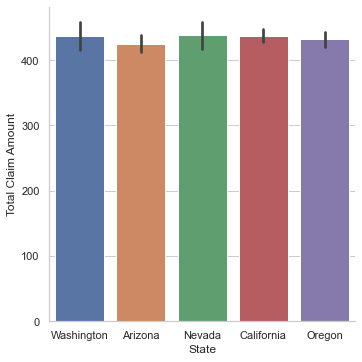

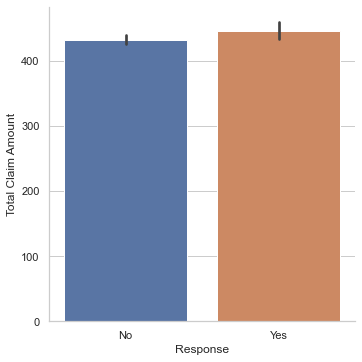

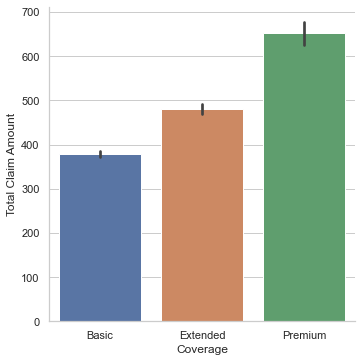

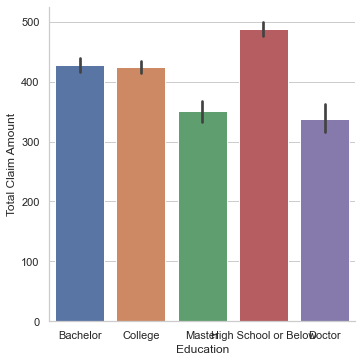

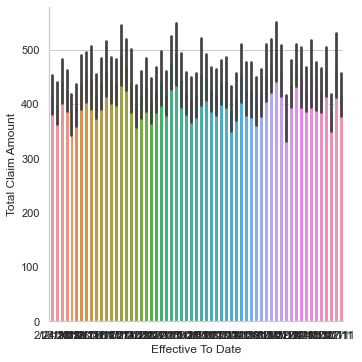

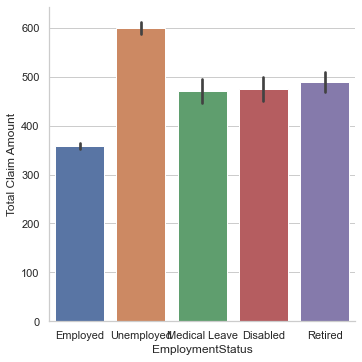

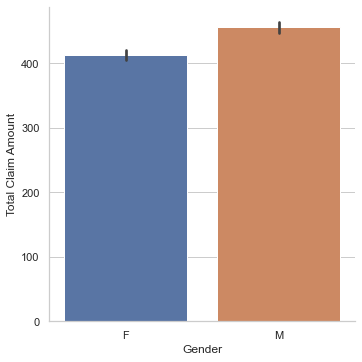

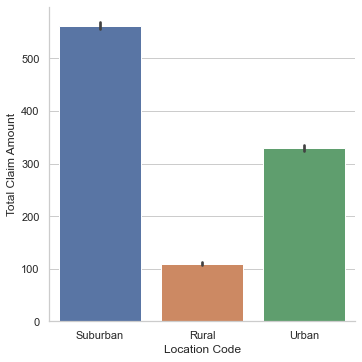

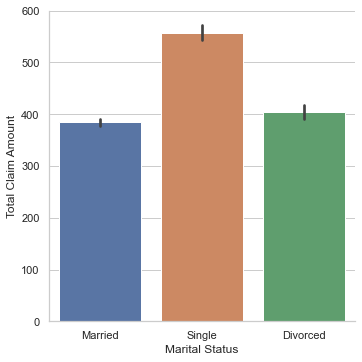

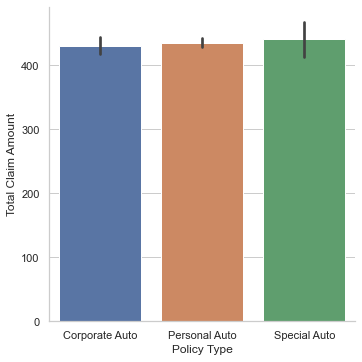

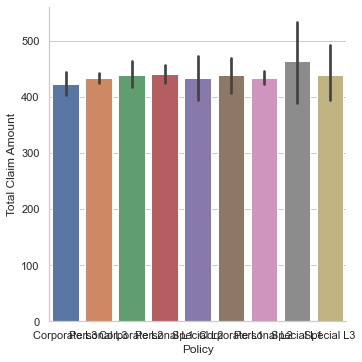

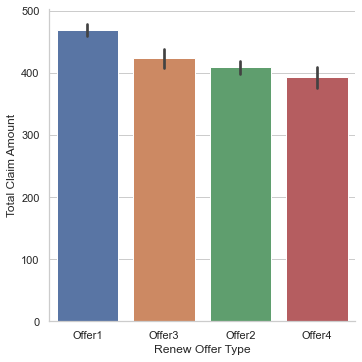

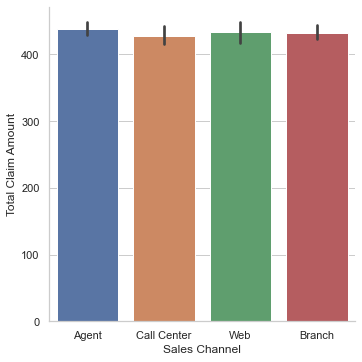

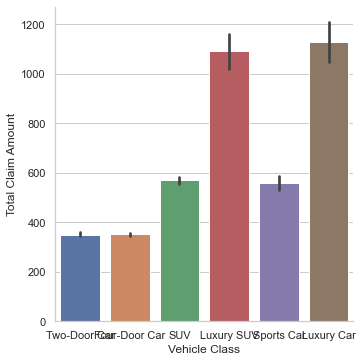

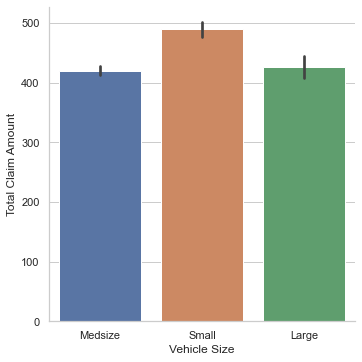

In [8]:
for column in categorical_df:
    sns.set_theme(style="whitegrid")
    sns.catplot(
    data=customer_df, kind="bar",
    x=column, y=target)


The main difference I found in comparison with the previous lab is than in the previous one the y-axis was a counts of the values of the x-axis but this time the y-axis it's the mean of my target variable en each ones of the entries of the x-axis

### 6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [9]:
# Duplicated Rows

print('Number of rows ' + str(categorical_df.shape[0]))

print('Number of duplicated rows ' + str(categorical_df.duplicated().value_counts()[1]))

#Remove duplicated in the DataFrame
categorical_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

print('Number of rows after removing duplicated rows ' + str(categorical_df.shape[0]))

Number of rows 9134
Number of duplicated rows 168
Number of rows after removing duplicated rows 8966


In [10]:
#Check if the are NaN values after the draws drop
categorical_df.isna().sum()

State                0
Response             0
Coverage             0
Education            0
Effective To Date    0
EmploymentStatus     0
Gender               0
Location Code        0
Marital Status       0
Policy Type          0
Policy               0
Renew Offer Type     0
Sales Channel        0
Vehicle Class        0
Vehicle Size         0
dtype: int64

In [11]:
# Rename the columns so they follow the PE8 (snake case).
categorical_df.columns = [x.lower() for x in categorical_df.columns]
categorical_df.columns = categorical_df.columns.str.replace(" ", "_", regex=True)

In [12]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [13]:
for column in categorical_df:
    display(categorical_df[column].value_counts())

California    3079
Oregon        2541
Arizona       1681
Nevada         872
Washington     793
Name: state, dtype: int64

No     7821
Yes    1145
Name: response, dtype: int64

Basic       5466
Extended    2695
Premium      805
Name: coverage, dtype: int64

Bachelor                2703
College                 2629
High School or Below    2573
Master                   728
Doctor                   333
Name: education, dtype: int64

1/27/11    191
1/10/11    190
1/17/11    180
2/14/11    179
1/19/11    179
1/3/11     174
1/26/11    174
1/31/11    169
2/19/11    166
1/20/11    166
1/28/11    165
2/26/11    164
2/4/11     164
2/27/11    164
1/5/11     163
1/11/11    162
2/10/11    159
1/21/11    158
2/7/11     156
2/22/11    155
2/28/11    155
1/29/11    155
2/5/11     154
1/2/11     154
2/3/11     154
2/12/11    154
1/23/11    151
1/18/11    151
2/1/11     150
2/11/11    150
1/14/11    149
2/2/11     149
1/15/11    149
1/8/11     148
2/25/11    148
1/7/11     147
1/25/11    147
2/18/11    147
2/21/11    146
1/9/11     145
1/13/11    145
1/1/11     144
1/24/11    143
2/6/11     143
1/30/11    141
1/6/11     141
1/16/11    141
2/23/11    139
2/24/11    138
2/13/11    137
2/16/11    137
2/9/11     136
1/22/11    136
2/8/11     134
2/17/11    133
2/15/11    130
2/20/11    130
1/12/11    122
1/4/11     115
Name: effective_to_date, dtype: int64

Employed         5602
Unemployed       2293
Medical Leave     420
Disabled          397
Retired           254
Name: employmentstatus, dtype: int64

F    4577
M    4389
Name: gender, dtype: int64

Suburban    5652
Rural       1750
Urban       1564
Name: location_code, dtype: int64

Married     5208
Single      2431
Divorced    1327
Name: marital_status, dtype: int64

Personal Auto     6636
Corporate Auto    1953
Special Auto       377
Name: policy_type, dtype: int64

Personal L3     3330
Personal L2     2082
Personal L1     1224
Corporate L3    1003
Corporate L2     592
Corporate L1     358
Special L2       163
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3683
Offer2    2830
Offer3    1429
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3392
Branch         2532
Call Center    1737
Web            1305
Name: sales_channel, dtype: int64

Four-Door Car    4539
Two-Door Car     1851
SUV              1766
Sports Car        469
Luxury SUV        180
Luxury Car        161
Name: vehicle_class, dtype: int64

Medsize    6306
Small      1736
Large       924
Name: vehicle_size, dtype: int64

#### I'm gonna change the type the column 'effective_to_date' to datetime64[ns]


In [14]:
categorical_df['effective_to_date'] = categorical_df['effective_to_date'].astype('datetime64[ns]')

#### I'm gonna clean the column 'employmentstatus' packing the values 'Medical Leave' and 'Disabled' in the same value (Medical Leave)

In [15]:
categorical_df.employmentstatus.value_counts()

Employed         5602
Unemployed       2293
Medical Leave     420
Disabled          397
Retired           254
Name: employmentstatus, dtype: int64

In [16]:
def clean_employmentstatus_col(x):
    if x in ['Medical Leave', 'Disabled']:
        return 'Medical Leave'
    else:
        return x
    
categorical_df["employmentstatus"] = categorical_df["employmentstatus"].apply(clean_employmentstatus_col) # clean_gender_col(data["GENDER"])
#data["employmentstatus"] = data["employmentstatus"].apply(lambda x: clean_gender_col(x))

In [17]:
categorical_df.employmentstatus.value_counts()

Employed         5602
Unemployed       2293
Medical Leave     817
Retired           254
Name: employmentstatus, dtype: int64